# Task 3: Linear Regression

**Objective:** Implement and understand simple & multiple linear regression.

**Tools:** Scikit-learn, Pandas, Matplotlib

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Simple Linear Regression
We will predict `price` using only the `area` column.

In [3]:
# Simple Linear Regression
X_simple = df[['area']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_s = simple_model.predict(X_test_s)

mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Simple Linear Regression Metrics:\nMAE: {mae_s:.2f}\nMSE: {mse_s:.2f}\nR²: {r2_s:.2f}")

Simple Linear Regression Metrics:
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


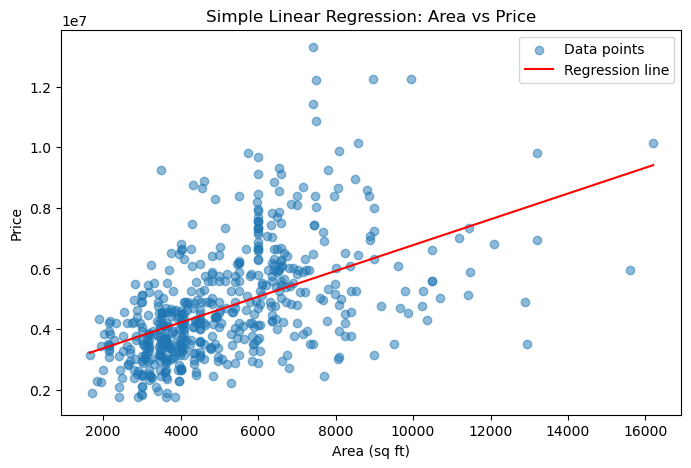

In [4]:
# Plot regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_simple, y, alpha=0.5, label='Data points')
x_line = np.linspace(X_simple['area'].min(), X_simple['area'].max(), 100).reshape(-1, 1)
y_line = simple_model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

## Multiple Linear Regression
Now we use all available features to predict price.

In [5]:
# One-hot encoding of categorical variables
X = df.drop('price', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['price']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_m = multi_model.predict(X_test_m)

# Evaluation
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f"Multiple Linear Regression Metrics:\nMAE: {mae_m:.2f}\nMSE: {mse_m:.2f}\nR²: {r2_m:.2f}")

Multiple Linear Regression Metrics:
MAE: 970043.40
MSE: 1754318687330.66
R²: 0.65


In [6]:
# Coefficients table
coeff_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_encoded.columns),
    'Coefficient': [multi_model.intercept_] + list(multi_model.coef_)
})
coeff_df

,Feature,Coefficient
0,Intercept,2.600324e+05
1,area,2.359688e+02
2,bedrooms,7.677870e+04
3,bathrooms,1.094445e+06
4,stories,4.074766e+05
5,parking,2.248419e+05
6,mainroad_yes,3.679199e+05
7,guestroom_yes,2.316100e+05
8,basement_yes,3.902512e+05
9,hotwaterheating_yes,6.846499e+05
